# **Mileage Prediction using Regression Analysis**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
mileage = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv")

**Explore Data**

In [122]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [123]:
mileage.shape

(398, 9)

In [124]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [125]:
mileage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [126]:
mileage.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

**Identifying and Removing Missing Values**

In [127]:
mileage.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [128]:
mileage = mileage.dropna()

In [129]:
mileage.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [130]:
mileage.shape

(392, 9)

**Data Preprocessing**

In [131]:
# Dropping name as it is not required
mileage = mileage.drop(['name'], axis = 1)

In [132]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**Outlier Visualization**

<Axes: >

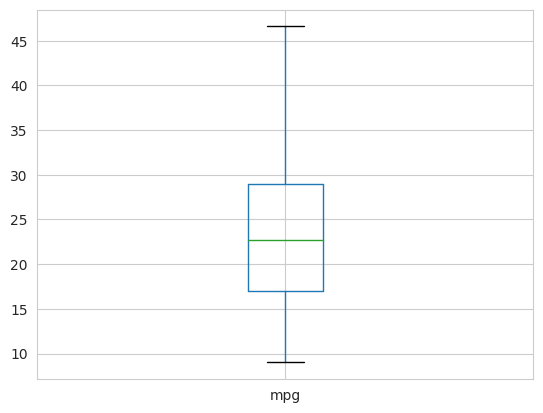

In [133]:
mileage.boxplot(['mpg'])

<Axes: >

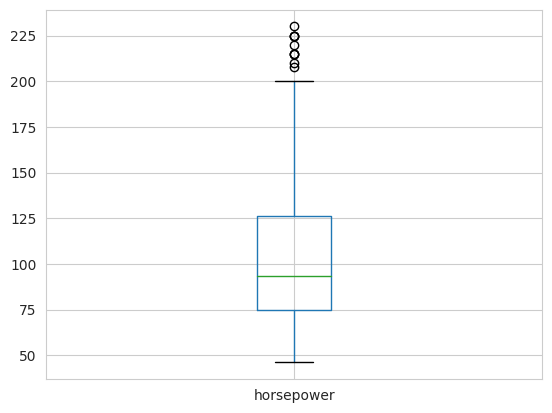

In [134]:
mileage.boxplot(['horsepower'])

<Axes: >

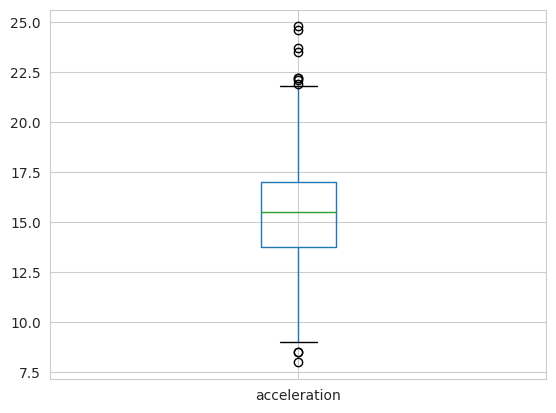

In [135]:
mileage.boxplot(['acceleration'])

In [136]:
mileage1 = mileage.copy()
mileage1.shape

(392, 8)

In [137]:
numeric_cols = mileage1.select_dtypes(include=[float, int]).columns

**Calculating quantiles for each feature**

In [138]:
Q1 = mileage1[numeric_cols].quantile(0.25)
Q3 = mileage1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

mpg               12.00
cylinders          4.00
displacement     170.75
horsepower        51.00
weight          1389.50
acceleration       3.25
model_year         6.00
dtype: float64

**Identifying and Removing Outliers**

In [139]:
outliers = mileage1[((mileage1[numeric_cols] < (Q1 - 1.5 * IQR)) | (mileage1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
6,14.0,8,454.0,220.0,4354,9.0,70,usa
7,14.0,8,440.0,215.0,4312,8.5,70,usa
8,14.0,8,455.0,225.0,4425,10.0,70,usa
9,15.0,8,390.0,190.0,3850,8.5,70,usa
11,14.0,8,340.0,160.0,3609,8.0,70,usa


In [140]:
out = mileage1[~((mileage1[numeric_cols] < (Q1 - 1.5 * IQR)) | (mileage1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
mileage = out.copy()
mileage.shape

(372, 8)

**Data Visualization**

<ipython-input-141-6447c45caaa0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mileage["mpg"])


<Axes: title={'center': 'Distribution of MPG'}, xlabel='mpg', ylabel='Density'>

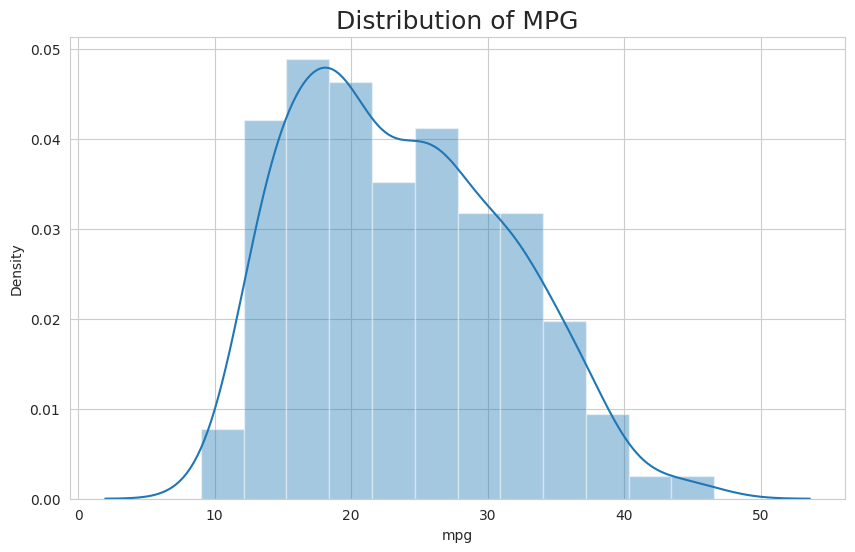

In [141]:
plt.figure(figsize=(10,6))
plt.title("Distribution of MPG",fontsize=18)

sns.distplot(mileage["mpg"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13916\23761643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="mpg", x="origin", data=mileage, palette="muted")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13916\23761643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="mpg", x="model_year", data=mileage, palette="muted")


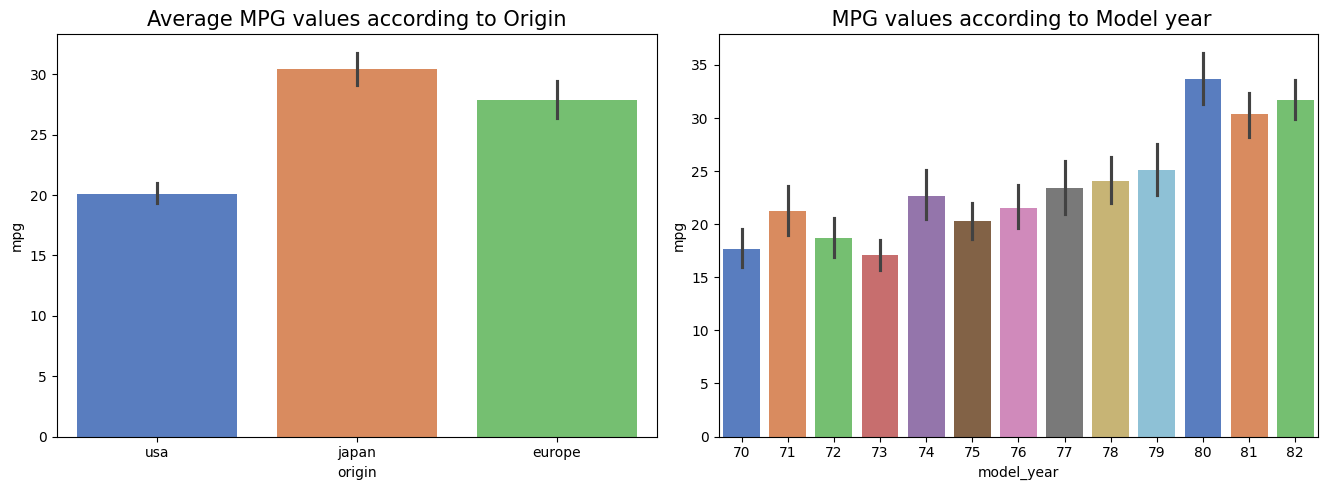

In [3]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.title("Average MPG values according to Origin", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y="mpg", x="origin", data=mileage, palette="muted")

plt.subplot(1,3,2)
plt.title(" MPG values according to Model year", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y="mpg", x="model_year", data=mileage, palette="muted")

plt.tight_layout()
plt.show()

<Axes: title={'center': 'MPG values according to Number of Cylinders'}, xlabel='cylinders', ylabel='mpg'>

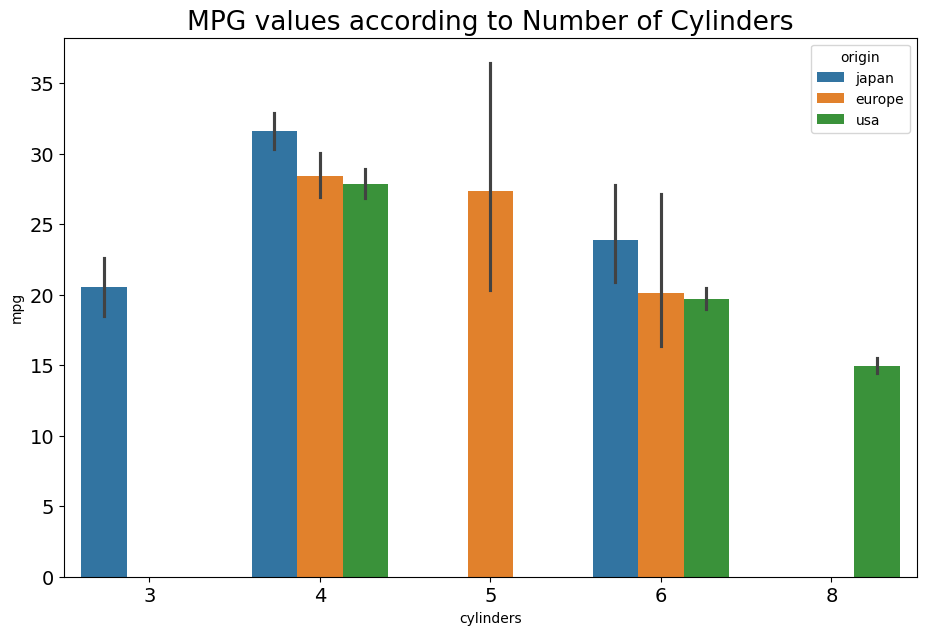

In [4]:
plt.figure(figsize=(11,7))
plt.title("MPG values according to Number of Cylinders",fontsize=19)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(x="cylinders",y="mpg",data=mileage,hue="origin")

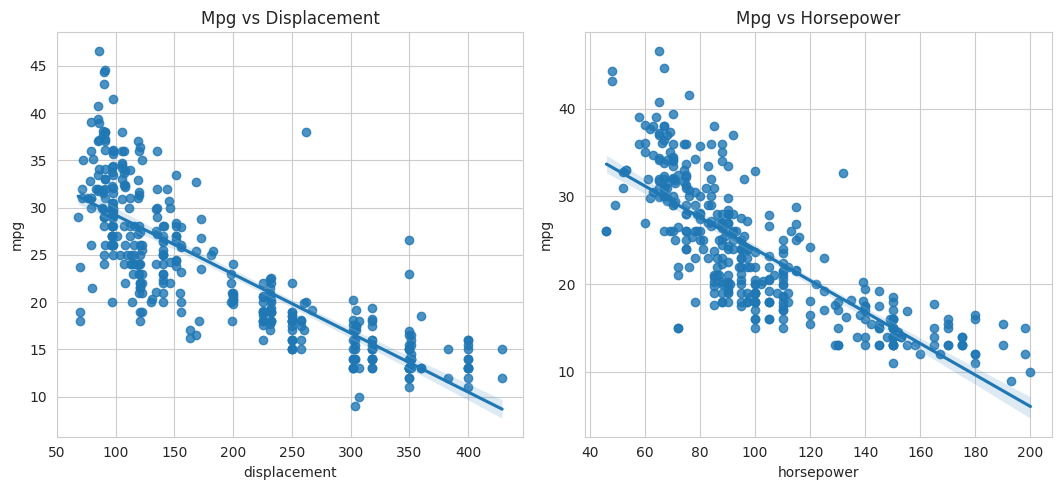

In [144]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
sns.regplot(x='displacement', y='mpg', data=mileage)
plt.title('Mpg vs Displacement')

plt.subplot(1,3,2)
sns.regplot(x='horsepower', y='mpg', data=mileage)
plt.title('Mpg vs Horsepower')

plt.tight_layout()
plt.show()

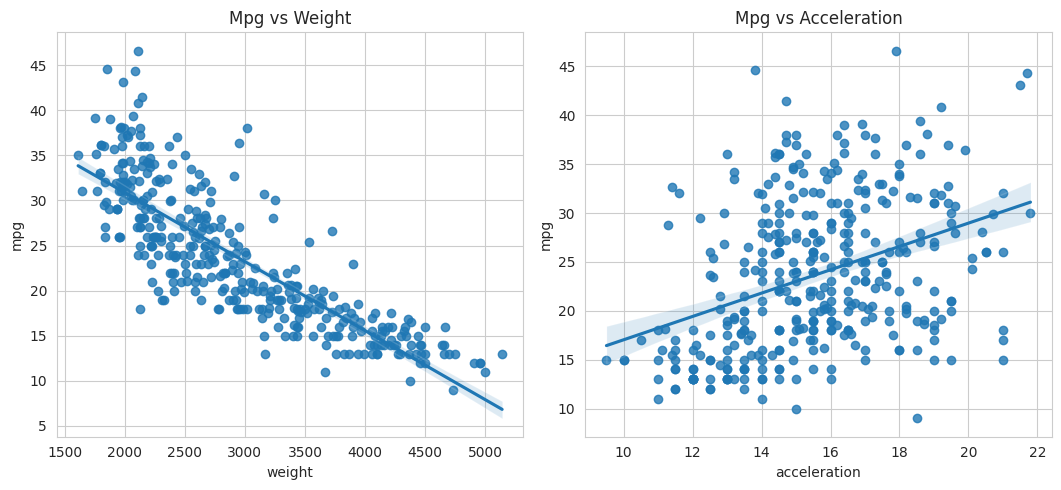

In [145]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
sns.regplot(x='weight', y='mpg', data=mileage)
plt.title('Mpg vs Weight')

plt.subplot(1,3,2)
sns.regplot(x='acceleration', y='mpg', data=mileage)
plt.title('Mpg vs Acceleration')

plt.tight_layout()
plt.show()

**Encoding of Categorical Features**

In [146]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [147]:
mileage.replace({'origin':{'usa':0, 'japan':1, 'europe':2}},inplace=True)
mileage['origin'].unique()

array([0, 1, 2])

In [148]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


**Correlation Visualization**

In [149]:
corr_matrix = mileage.corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.773752,-0.807124,-0.791483,-0.832137,0.375479,0.552155,0.459563
cylinders,-0.773752,1.000000,0.955883,0.857902,0.898313,-0.474818,-0.305033,-0.545074
displacement,-0.807124,0.955883,1.000000,0.888231,0.940350,-0.489523,-0.315537,-0.598322
horsepower,-0.791483,0.857902,0.888231,1.000000,0.882085,-0.652216,-0.354527,-0.443736
weight,-0.832137,0.898313,0.940350,0.882085,1.000000,-0.382518,-0.268218,-0.523447
acceleration,0.375479,-0.474818,-0.489523,-0.652216,-0.382518,1.000000,0.225736,0.201425
model_year,0.552155,-0.305033,-0.315537,-0.354527,-0.268218,0.225736,1.000000,0.028495
origin,0.459563,-0.545074,-0.598322,-0.443736,-0.523447,0.201425,0.028495,1.000000


<Axes: >

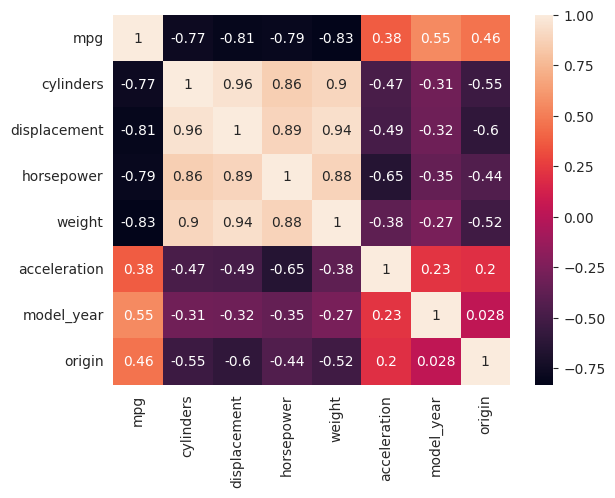

In [150]:
sns.heatmap(corr_matrix, annot=True)

**Define Target Variable (y) and Feature Variables (X)**

In [151]:
mileage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [152]:
Y = mileage['mpg']
X = mileage.drop(['mpg'], axis=1)

**Scaling Data**

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler = StandardScaler()

In [155]:
X = scaler.fit_transform(X)
X

array([[ 1.54967618,  1.19755464,  0.8365249 , ..., -1.47816963,
        -1.68623751, -0.7198213 ],
       [ 1.54967618,  1.63372809,  1.87768293, ..., -1.68658348,
        -1.68623751, -0.7198213 ],
       [ 1.54967618,  1.30913389,  1.43147235, ..., -1.89499732,
        -1.68623751, -0.7198213 ],
       ...,
       [-0.84483904, -0.54713919, -0.53185423, ..., -1.64490071,
         1.62540536, -0.7198213 ],
       [-0.84483904, -0.69929272, -0.68059109, ...,  1.27289319,
         1.62540536, -0.7198213 ],
       [-0.84483904, -0.70943629, -0.59134898, ...,  1.60635535,
         1.62540536, -0.7198213 ]])

In [156]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02
mean,1.146037e-16,3.820122e-17,9.550306e-17,-2.292073e-16,4.966159e-16,3.056098e-16,9.311548e-17
std,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00
min,-1.443468e+00,-1.226758e+00,-1.662254e+00,-1.607217e+00,-2.520239e+00,-1.686238e+00,-7.198213e-01
25%,-8.448390e-01,-8.514463e-01,-7.772701e-01,-8.742738e-01,-6.445142e-01,-8.583268e-01,-7.198213e-01
50%,-8.448390e-01,-4.355599e-01,-2.938753e-01,-2.167986e-01,-1.927268e-02,-3.041607e-02,-7.198213e-01
75%,3.524186e-01,7.005198e-01,5.390512e-01,7.220204e-01,6.059689e-01,7.974946e-01,5.863910e-01
max,1.549676e+00,2.435070e+00,2.918841e+00,2.651580e+00,2.606742e+00,1.625405e+00,1.892603e+00


**Train Test Split**

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [159]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((260, 7), (112, 7), (260,), (112,))

**Linear Regression Model**

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
model = LinearRegression()

In [162]:
model.fit(X_train, Y_train)

LinearRegression()

In [163]:
model.intercept_

23.628052682522636

In [164]:
model.coef_

array([-0.50135979,  1.34221114, -1.15387322, -5.0368124 , -0.33536118,
        2.74294796,  0.86813239])

**Predict Test Data**

In [165]:
Y_pred = model.predict(X_test)
Y_pred

array([19.73975622, 24.64201455, 26.05038574, 29.14981496, 14.99294746,
       21.7788154 , 32.62803353, 12.88038145, 21.01171795, 24.50691574,
       24.18170789, 15.33322334, 33.17643801, 22.942313  , 26.16261232,
        7.20773887, 22.75612333, 19.38957848, 13.79606232, 11.81867474,
       28.81910314, 34.81580875, 27.78827917, 17.52350915, 20.61763759,
        5.8618191 , 32.71714101, 21.6257444 , 32.53238094, 19.22645884,
       28.19304564, 12.54594812, 24.05961235, 26.85188497, 29.24175531,
       25.26727076, 28.05695493, 20.57242538, 28.6640089 , 13.6901688 ,
       24.08024669, 33.47160003, 26.53250102, 19.64641078, 17.12636372,
       25.42107226, 27.91931573, 22.14220113, 29.77509091, 24.45841815,
       18.0953259 , 35.35383011, 17.16165273, 21.81254466, 30.21397205,
       15.33716342, 27.20581328,  8.42970008, 18.6978128 , 24.28253804,
       22.69310868, 24.53428561, 22.03560633, 24.11003979, 23.40230684,
       11.07201626, 11.87721053, 31.50405132, 33.40928855, 25.53

In [166]:
Y_pred.shape

(112,)

**Model Evaluation**

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [172]:
MSE = mean_squared_error(Y_test, Y_pred)
print('Test Mean Squared Error for test data: ', MSE)

Test Mean Squared Error for test data:  11.634093277915296


In [173]:
MAE = mean_absolute_error(Y_test, Y_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  2.5931406303993447


In [174]:
MAPE = mean_absolute_percentage_error(Y_test, Y_pred)
print('Test Mean Absolute Percentage Error for test data: ', MAPE)

Test Mean Absolute Percentage Error for test data:  0.11476197964343192


In [175]:
R2 = r2_score(Y_test, Y_pred)
print('Test R2 Score for test data: ', R2)

Test R2 Score for test data:  0.8069533559605463


**Actual vs Predicted Results**

In [176]:
result = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred.flatten()})
result

,Actual,Predicted
0,23.0,19.739756
1,26.0,24.642015
2,25.1,26.050386
3,25.8,29.149815
4,13.0,14.992947
...,...,...
107,24.0,24.708855
108,32.0,32.263488
109,23.8,25.174537
110,27.0,24.257251


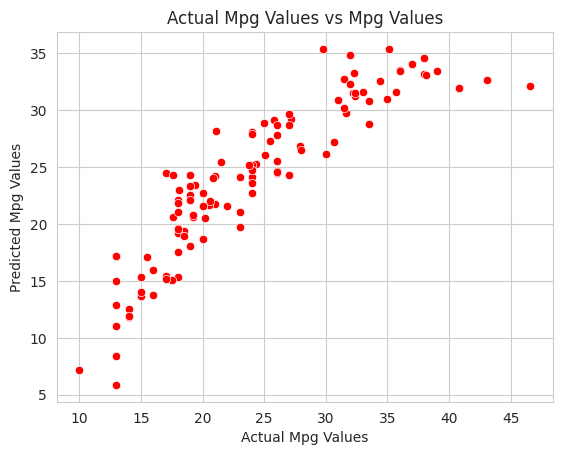

In [178]:
sns.scatterplot(x=Y_test, y=Y_pred,color='red')
plt.xlabel('Actual Mpg Values')
plt.ylabel('Predicted Mpg Values')
plt.title('Actual Mpg Values vs Mpg Values')
plt.show()